# Análise de Cidadãos alistados no Serviço Militar em 2024

**Autor**: Wellington M Santos - Cientista de Dados <br>
**Contato**: [Linkedin](https://www.linkedin.com/in/wellington-moreira-santos/) | wsantos08@hotmail.com

 Dados de brasileiros que se alistaram no Serviço Militar com ano de nascimento, peso, altura, tamanho da cabeça, número do calçado, tamanho da cintura, município, UF e país de nascimento, estado civil, sexo, escolaridade, ano de alistamento, se foi dispensado ou não, zona residencial, município, uf e país de residência, junta, município e UF da junta.
Catalogação: 07/04/2025<br>
Data de atualização do arquivo: 03/04/2025


*Fonte*: https://dados.gov.br/dados/conjuntos-dados/servico-militar

## Dependências e Configurações

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# versões
print("\nVersões utilizadas: \n----------------")
print("Versão do Python: ", sys.version)
print("Versão do Pandas: ", pd.__version__)
print("Versão Numpy: ", np.__version__)
print("Versão do Seaborn: ", sns.__version__)
print()


Versões utilizadas: 
----------------
Versão do Python:  3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Versão do Pandas:  2.2.3
Versão Numpy:  1.26.4
Versão do Seaborn:  0.13.2



## Carga e Analise Inicial

In [2]:
try:
    url = 'https://dadosabertos.eb.mil.br/arquivos/sermil/sermil2024.csv'
    df = pd.read_csv(url, encoding='utf-8', sep=',')
    # df = pd.read_csv("./datasets/sermil2024.csv", encoding='utf-8', sep=',')
    print("Dados carregados!")
except FileNotFoundError:
    print("Erro: O arquivo não foi encontrado. Verifique o caminho do arquivo.")
except pd.errors.ParserError:
    print("Erro: O arquivo CSV pode estar corrompido ou ter um formato inválido.")
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")

Dados carregados!


In [3]:
# primeiros registros
df.head()

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
0,1998,70.0,169.0,55.0,40.0,82.0,CACERES,MT,BRASIL,Casado,...,3° Ano - Ensino Médio,2024,Com dispensa,Urbana,CACERES,MT,BRASIL,30/24 - CACERES,CACERES,MT
1,1998,72.0,180.0,57.0,38.0,87.0,CAMPO GRANDE,MS,BRASIL,Solteiro,...,3° Semestre - Ensino Superior,2024,Com dispensa,Urbana,CAMPO GRANDE,MS,BRASIL,30/26 - CAMPO GRANDE,CAMPO GRANDE,MS
2,1970,57.0,173.0,59.0,40.0,NaN,MACAPA,AP,BRASIL,Solteiro,...,Ensino Fundamental Completo,2024,Sem dispensa,Urbana,MACAPA,AP,BRASIL,28/45 - MACAPA,MACAPA,AP
3,2003,65.0,170.0,58.0,40.0,77.0,BARUERI,SP,BRASIL,Solteiro,...,2° Semestre - Ensino Superior,2024,Com dispensa,Urbana,BARUERI,SP,BRASIL,4/22 - BARUERI,BARUERI,SP
4,2000,76.0,171.0,55.0,42.0,76.0,RECIFE,PE,BRASIL,Solteiro,...,Ensino Médio Completo,2024,Com dispensa,Urbana,RECIFE,PE,BRASIL,21/1 - RECIFE (COMPAZ DOM HELDER CAMARA),RECIFE,PE


In [4]:
# ultimos registros
df.tail()

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
885533,2006,NaN,NaN,NaN,NaN,NaN,FAZENDA RIO GRANDE,PR,BRASIL,Solteiro,...,Ensino Médio Completo,2024,Com dispensa,Urbana,FAZENDA RIO GRANDE,PR,BRASIL,15/326 - FAZENDA RIO GRANDE,FAZENDA RIO GRANDE,PR
885534,2006,NaN,NaN,NaN,NaN,NaN,SOROCABA,SP,BRASIL,Solteiro,...,3° Ano - Ensino Médio,2024,Com dispensa,Urbana,SOROCABA,SP,BRASIL,14/154 - SOROCABA,SOROCABA,SP
885535,2006,NaN,NaN,NaN,NaN,NaN,TAQUARITINGA DO NORTE,PE,BRASIL,Solteiro,...,Ensino Médio Completo,2024,Com dispensa,Rural,TAQUARITINGA DO NORTE,PE,BRASIL,21/99 - TAQUARITINGA DO NORTE,TAQUARITINGA DO NORTE,PE
885536,2006,NaN,NaN,NaN,NaN,NaN,SOROCABA,SP,BRASIL,Solteiro,...,2° Ano - Ensino Médio,2024,Com dispensa,Rural,IBIUNA,SP,BRASIL,14/59 - IBIUNA,IBIUNA,SP
885537,2006,NaN,NaN,NaN,NaN,NaN,EUCLIDES DA CUNHA,BA,BRASIL,Solteiro,...,2° Ano - Ensino Médio,2024,Com dispensa,Urbana,QUIJINGUE,BA,BRASIL,17/60 - QUIJINGUE,QUIJINGUE,BA


In [9]:
# dimensões
f"O dataset apresenta {df.shape[0]} Registros e {df.shape[1]} Colunas"

'O dataset apresenta 885538 Registros e 21 Colunas'

In [11]:
# tipo de dados
df.dtypes

ANO_NASCIMENTO        int64
PESO                float64
ALTURA              float64
CABECA              float64
CALCADO             float64
CINTURA             float64
MUN_NASCIMENTO       object
UF_NASCIMENTO        object
PAIS_NASCIMENTO      object
ESTADO_CIVIL         object
SEXO                 object
ESCOLARIDADE         object
VINCULACAO_ANO        int64
DISPENSA             object
ZONA_RESIDENCIAL     object
MUN_RESIDENCIA       object
UF_RESIDENCIA        object
PAIS_RESIDENCIA      object
JSM                  object
MUN_JSM              object
UF_JSM               object
dtype: object

In [10]:
# atributos
df.columns.tolist()

['ANO_NASCIMENTO',
 'PESO',
 'ALTURA',
 'CABECA',
 'CALCADO',
 'CINTURA',
 'MUN_NASCIMENTO',
 'UF_NASCIMENTO',
 'PAIS_NASCIMENTO',
 'ESTADO_CIVIL',
 'SEXO',
 'ESCOLARIDADE',
 'VINCULACAO_ANO',
 'DISPENSA',
 'ZONA_RESIDENCIAL',
 'MUN_RESIDENCIA',
 'UF_RESIDENCIA',
 'PAIS_RESIDENCIA',
 'JSM',
 'MUN_JSM',
 'UF_JSM']

**Contexto aos atributos**

Documentação do Recurso: Relação de Juntas de Serviço Militar (JSM)

| Coluna        | Tipo   | Descrição                                                                                                     |
| ------------- | ------ | ------------------------------------------------------------------------------------------------------------- |
| JSM           | texto  | Código que identifica a junta. Os dígitos antes da “/” informam a Circunscrição de Serviço Militar enquadrante |
| ENDERECO      | texto  | Endereço da JSM                                                                                               |
| BAIRRO        | texto  | Bairro da JSM                                                                                                 |
| CEP           | texto  | CEP da JSM                                                                                                    |
| TELEFONE      | texto  | Telefone de contato da JSM                                                                                    |
| MUNICIPIO_JSM | texto  | Município                                                                                                     |
| UF_JSM        | texto  | UF (KK - UF no exterior)                                                                                      |


In [12]:
# informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885538 entries, 0 to 885537
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ANO_NASCIMENTO    885538 non-null  int64  
 1   PESO              344226 non-null  float64
 2   ALTURA            344185 non-null  float64
 3   CABECA            343999 non-null  float64
 4   CALCADO           343989 non-null  float64
 5   CINTURA           343986 non-null  float64
 6   MUN_NASCIMENTO    885538 non-null  object 
 7   UF_NASCIMENTO     885538 non-null  object 
 8   PAIS_NASCIMENTO   885538 non-null  object 
 9   ESTADO_CIVIL      885538 non-null  object 
 10  SEXO              885538 non-null  object 
 11  ESCOLARIDADE      885538 non-null  object 
 12  VINCULACAO_ANO    885538 non-null  int64  
 13  DISPENSA          885533 non-null  object 
 14  ZONA_RESIDENCIAL  885538 non-null  object 
 15  MUN_RESIDENCIA    885538 non-null  object 
 16  UF_RESIDENCIA     88

In [6]:
# dados faltantes
df.isnull().sum()

ANO_NASCIMENTO           0
PESO                541312
ALTURA              541353
CABECA              541539
CALCADO             541549
CINTURA             541552
MUN_NASCIMENTO           0
UF_NASCIMENTO            0
PAIS_NASCIMENTO          0
ESTADO_CIVIL             0
SEXO                     0
ESCOLARIDADE             0
VINCULACAO_ANO           0
DISPENSA                 5
ZONA_RESIDENCIAL         0
MUN_RESIDENCIA           0
UF_RESIDENCIA            0
PAIS_RESIDENCIA          0
JSM                      0
MUN_JSM                  0
UF_JSM                   0
dtype: int64

In [8]:
# margens de faltantes %
faltantes = df.isnull().sum()
faltantes_perc = (faltantes / len(df)) * 100

faltantes_perc.sort_values(ascending=False)

CINTURA             61.155140
CALCADO             61.154801
CABECA              61.153672
ALTURA              61.132667
PESO                61.128037
DISPENSA             0.000565
ANO_NASCIMENTO       0.000000
UF_NASCIMENTO        0.000000
MUN_NASCIMENTO       0.000000
ESTADO_CIVIL         0.000000
SEXO                 0.000000
ESCOLARIDADE         0.000000
PAIS_NASCIMENTO      0.000000
VINCULACAO_ANO       0.000000
ZONA_RESIDENCIAL     0.000000
MUN_RESIDENCIA       0.000000
UF_RESIDENCIA        0.000000
PAIS_RESIDENCIA      0.000000
JSM                  0.000000
MUN_JSM              0.000000
UF_JSM               0.000000
dtype: float64

*Mais de 60% dos dados de medidas físicas estão ausentes. Isso é uma informação crucial. Qualquer análise sobre o perfil físico dos alistados (como o peso médio) será baseada em apenas 40% da amostra. É importante ter isso em mente.*

## Estatísticas Descritivas

### Atributos Numéricos

In [13]:
df.describe()

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,VINCULACAO_ANO
count,885538.000000,344226.000000,344185.000000,343999.000000,343989.000000,343986.000000,885538.0
mean,2005.913238,71.852890,173.025228,57.223562,41.316324,80.157201,2024.0
std,0.431645,15.183417,9.113056,2.746640,1.653535,12.118015,0.0
min,1970.000000,30.000000,130.000000,41.000000,30.000000,50.000000,2024.0
25%,2006.000000,61.000000,169.000000,56.000000,40.000000,73.000000,2024.0
50%,2006.000000,69.000000,174.000000,57.000000,41.000000,79.000000,2024.0
75%,2006.000000,79.000000,180.000000,59.000000,42.000000,88.000000,2024.0
max,2008.000000,200.000000,220.000000,79.000000,50.000000,180.000000,2024.0


**A análise dos dados revelou informações importantes sobre os alistados:**

ANO_NASCIMENTO: A idade predominante dos alistados é de 2006, com uma média de 2005.91 e um desvio padrão muito baixo (0.43). Os quartis indicam que a maioria nasceu em 2006. Valores extremos (1970 e 2008) são considerados outliers e podem ser investigados separadamente.

PESO e ALTURA:
    Peso Médio: 71.85 kg
    Altura Média: 173.02 cm
    Valores mínimos e máximos (peso: 30-200 kg, altura: 130-220 cm) são extremos, mas plausíveis. 

VINCULACAO_ANO: Coluna constante (2024), pode ser ignorada na análise de variabilidade.

Em resumo, a análise destaca a concentração de alistados nascidos em 2006, com dados de peso e altura que requerem atenção aos valores extremos.

### Visualizando algumas distribuições
Gráficos nos ajudarão a confirmar nossas suspeitas sobre a distribuição e os outliers.

Vamos criar três gráficos essenciais:

Histograma do Ano de Nascimento: Para visualizar a enorme concentração em 2006.

Boxplot do Peso: Para ver a distribuição e identificar claramente os outliers.

Gráfico de Barras da Situação de Dispensa: Para entender a proporção de alistados dispensados e não dispensados.

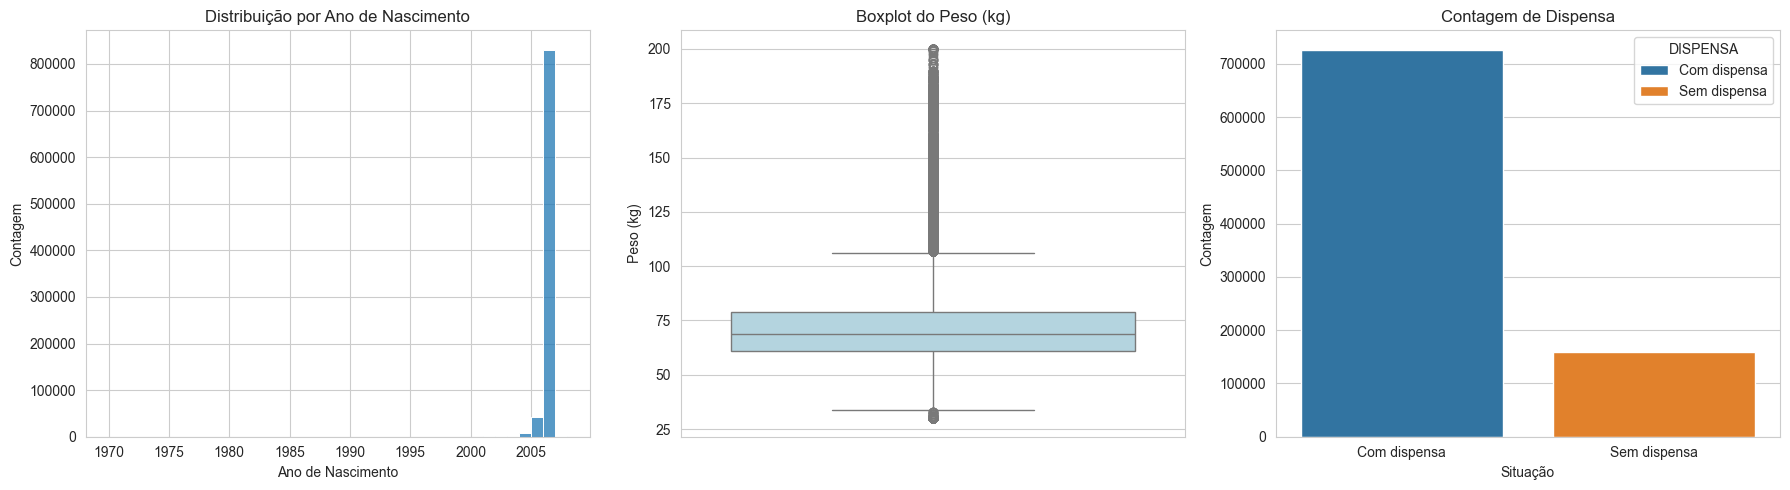

In [17]:
# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# 1. Histograma do Ano de Nascimento
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='ANO_NASCIMENTO', bins=range(df['ANO_NASCIMENTO'].min(), df['ANO_NASCIMENTO'].max() + 1), kde=False)
plt.title('Distribuição por Ano de Nascimento')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Contagem')

# 2. Boxplot do Peso
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='PESO', color='lightblue')
plt.title('Boxplot do Peso (kg)')
plt.ylabel('Peso (kg)')

# 3. Gráfico de Barras da Dispensa
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='DISPENSA', hue='DISPENSA')
plt.title('Contagem de Dispensa')
plt.xlabel('Situação')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

*O gráfico é massivamente composto por jovens de 18 anos em 2024, como o esperado. Os pesos estão entre 60-80k a mediana perto de 70k, também percebe-se muitos outliers com peso elevado (isso eleva a média). A grande maioria dos cidadãos que se alistam é, de fato, dispensada do serviço militar obrigatório. Este é um insight sobre o processo de alistamento no Brasil.*

### Atributos Categóricos

In [18]:
print("---------- Top 10 Níveis de Escolaridade ----------")
print(df['ESCOLARIDADE'].value_counts().head(10))

print("\n\n---------- Top 10 UFs de Residência ----------")
print(df['UF_RESIDENCIA'].value_counts().head(10))

print("\n\n---------- Contagem por Estado Civil ----------")
print(df['ESTADO_CIVIL'].value_counts())


---------- Top 10 Níveis de Escolaridade ----------
ESCOLARIDADE
3° Ano - Ensino Médio            324740
Ensino Médio Completo            240304
2° Ano - Ensino Médio            108615
1° Ano - Ensino Médio             62953
1° Semestre - Ensino Superior     41663
2° Semestre - Ensino Superior     21223
9° Ano - Ensino Fundamental       20708
8° Ano - Ensino Fundamental       11888
Ensino Fundamental Completo       11147
7° Ano - Ensino Fundamental        6954
Name: count, dtype: int64


---------- Top 10 UFs de Residência ----------
UF_RESIDENCIA
SP    213984
MG     84075
RJ     83822
RS     59947
PR     58403
BA     42129
SC     36491
PE     34953
PA     30590
CE     29533
Name: count, dtype: int64


---------- Contagem por Estado Civil ----------
ESTADO_CIVIL
Solteiro                  876604
Outros                      6270
Casado                      2515
Separado Judicialmente        54
Divorciado                    50
Desquitado                    28
Viúvo                        

## Limpeza e Tratamento

In [19]:
# criando um dataframe focado no publico-alvo (jovens de 18 anos)

print(f"Tamanho original do DataFrame: {df.shape}")
df_principal = df[df['ANO_NASCIMENTO'] == 2006].copy()
print(f"Tamanho do DataFrame focado (nascidos em 2006): {df_principal.shape}")

# Verificando as estatísticas do novo DataFrame para confirmar a mudança
print("\nEstatísticas do novo DataFrame 'df_principal':")
df_principal.describe()

Tamanho original do DataFrame: (885538, 21)
Tamanho do DataFrame focado (nascidos em 2006): (830501, 21)

Estatísticas do novo DataFrame 'df_principal':


,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,VINCULACAO_ANO
count,830501.0,289849.000000,289806.000000,289622.000000,289612.000000,289609.000000,830501.0
mean,2006.0,71.885437,173.356849,57.236059,41.337524,80.038462,2024.0
std,0.0,15.307883,8.920055,2.777086,1.652772,12.251141,0.0
min,2006.0,30.000000,130.000000,41.000000,30.000000,50.000000,2024.0
25%,2006.0,61.000000,169.000000,56.000000,40.000000,73.000000,2024.0
50%,2006.0,69.000000,175.000000,57.000000,41.000000,79.000000,2024.0
75%,2006.0,79.000000,180.000000,59.000000,42.000000,88.000000,2024.0
max,2006.0,200.000000,220.000000,79.000000,50.000000,180.000000,2024.0


## Análise Bivariada

--- Porcentagem de Dispensa por Nível de Escolaridade (Nascidos em 2006) ---
DISPENSA                       Com dispensa  Sem dispensa
ESCOLARIDADE                                             
1° Ano - Ensino Médio                 79.50         20.50
1° Semestre - Ensino Superior         84.26         15.74
2° Ano - Ensino Médio                 80.26         19.74
2° Semestre - Ensino Superior         77.37         22.63
3° Ano - Ensino Médio                 84.94         15.06
9° Ano - Ensino Fundamental           86.62         13.38
Ensino Médio Completo                 84.38         15.62


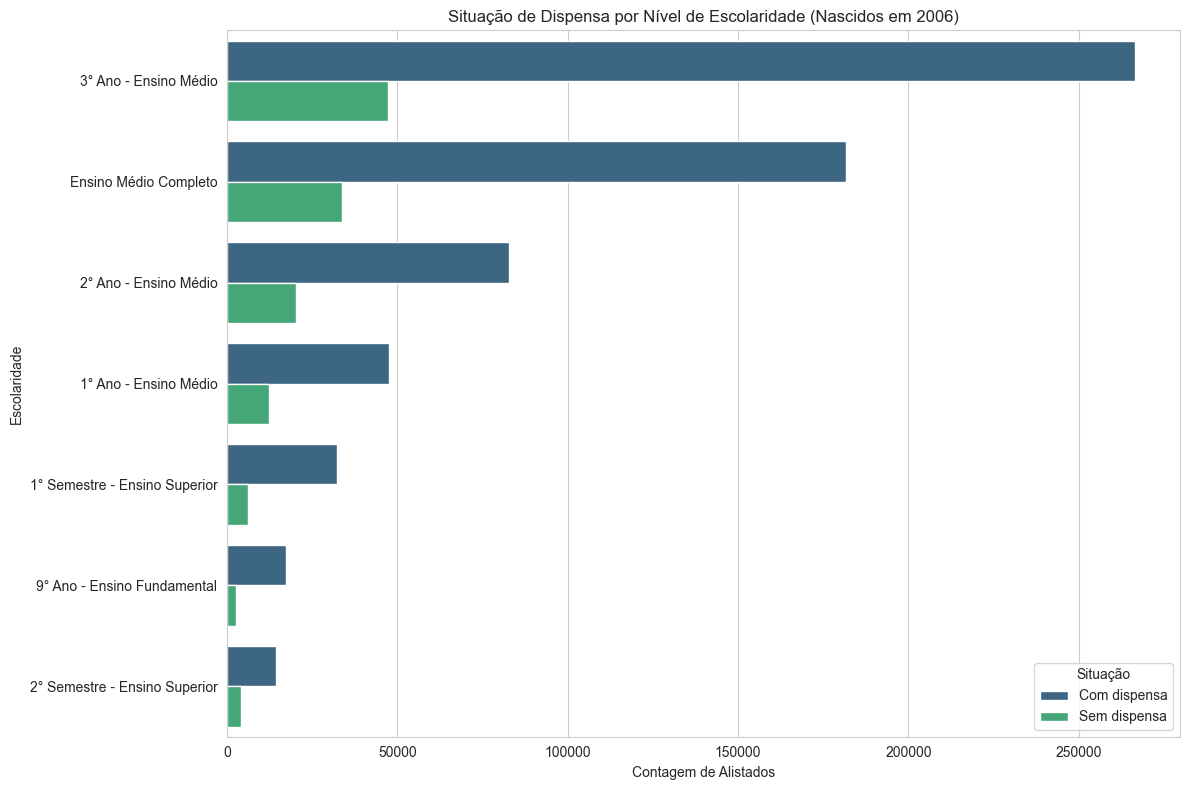

In [20]:
# Para os alistados de 18 anos, a escolaridade tem relação com o fato de serem dispensados?
top_7_escolaridade = df_principal['ESCOLARIDADE'].value_counts().head(7).index
df_analise = df_principal[df_principal['ESCOLARIDADE'].isin(top_7_escolaridade)]

tabela_cruzada = pd.crosstab(df_analise['ESCOLARIDADE'], 
                             df_analise['DISPENSA'], 
                             normalize='index')

print("--- Porcentagem de Dispensa por Nível de Escolaridade (Nascidos em 2006) ---")
# Multiplicando por 100 e arredondando para ver como porcentagem
print((tabela_cruzada * 100).round(2))

# --- Análise Visual com Gráfico de Barras ---
plt.figure(figsize=(12, 8))
# Usamos 'order' para ordenar as barras da mais comum para a menos comum
sns.countplot(data=df_analise, y='ESCOLARIDADE', hue='DISPENSA', palette='viridis', order=top_7_escolaridade)
plt.title('Situação de Dispensa por Nível de Escolaridade (Nascidos em 2006)')
plt.xlabel('Contagem de Alistados')
plt.ylabel('Escolaridade')
plt.legend(title='Situação')
plt.tight_layout()
plt.show()

In [12]:
df[df['MUN_JSM'] == 'NOVA IGUACU']

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
61,2006,81.0,180.0,56.0,42.0,60.0,QUEIMADOS,RJ,BRASIL,Solteiro,...,3° Ano - Ensino Médio,2024,Com dispensa,Rural,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
64,2006,83.0,165.0,55.0,40.0,60.0,JAPERI,RJ,BRASIL,Solteiro,...,3° Ano - Ensino Médio,2024,Com dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
80,2006,70.0,176.0,56.0,40.0,60.0,NOVA IGUACU,RJ,BRASIL,Solteiro,...,3° Ano - Ensino Médio,2024,Sem dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
209,2006,63.0,160.0,56.0,43.0,60.0,NOVA IGUACU,RJ,BRASIL,Casado,...,1° Ano - Ensino Médio,2024,Com dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
387,2005,68.0,185.0,55.0,42.0,60.0,NOVA IGUACU,RJ,BRASIL,Solteiro,...,2° Ano - Ensino Médio,2024,Com dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881683,2006,NaN,NaN,NaN,NaN,NaN,NOVA IGUACU,RJ,BRASIL,Solteiro,...,Ensino Fundamental Completo,2024,Sem dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
883445,2006,NaN,NaN,NaN,NaN,NaN,NOVA IGUACU,RJ,BRASIL,Solteiro,...,9° Ano - Ensino Fundamental,2024,Com dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
883595,2006,NaN,NaN,NaN,NaN,NaN,NOVA IGUACU,RJ,BRASIL,Solteiro,...,9° Ano - Ensino Fundamental,2024,Com dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
884630,2006,NaN,NaN,NaN,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,Solteiro,...,9° Ano - Ensino Fundamental,2024,Com dispensa,Urbana,NOVA IGUACU,RJ,BRASIL,2/131 - NOVA IGUACU,NOVA IGUACU,RJ
